In [1]:
# pandas 라이브러리를 Import하기
import pandas as pd

In [2]:
# 데이터 파일을 읽어오기

rock_samples = pd.read_csv('data/rocksamples.csv')


In [3]:
# 데이터프레임 처음과 마지막 5개행 확인하기

rock_samples.head()

rock_samples.tail()

pd.concat([rock_samples.head(), rock_samples.tail()])

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
0,10001,Apollo11,Soil,Unsieved,125.80,88.36
1,10002,Apollo11,Soil,Unsieved,5629.00,93.73
2,10003,Apollo11,Basalt,Ilmenite,213.00,65.56
3,10004,Apollo11,Core,Unsieved,44.80,71.76
4,10005,Apollo11,Core,Unsieved,53.40,40.31
2224,79528,Apollo17,Breccia,Regolith,2.38,100.00
2225,79529,Apollo17,Breccia,Regolith,1.84,100.00
2226,79535,Apollo17,Breccia,Regolith,1.69,100.00
2227,79536,Apollo17,Breccia,Regolith,1.66,100.00
2228,79537,Apollo17,Breccia,Regolith,1.05,100.00


In [4]:
#rock_samples 데이터프레임 정보 확인하기
rock_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2229 non-null   int64  
 1   Mission       2229 non-null   object 
 2   Type          2229 non-null   object 
 3   Subtype       2226 non-null   object 
 4   Weight (g)    2229 non-null   float64
 5   Pristine (%)  2229 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 104.6+ KB


In [5]:
#rock_samples 데이터프레임 행수 확인
rock_samples.shape[0]

2229

In [6]:
#rock_samples 데이터 프레임의 인덱스 확인
rock_samples.index

RangeIndex(start=0, stop=2229, step=1)

In [7]:
#rock_samples 데이터프레임 열수 확인
rock_samples.shape[1]

6

In [8]:
#rock_samples 데이터프레임의 모양 확인
rock_samples.shape

(2229, 6)

In [9]:
#rock_samples 데이터프레임의 컬럼명 확인
rock_samples.columns

Index(['ID', 'Mission', 'Type', 'Subtype', 'Weight (g)', 'Pristine (%)'], dtype='object')

In [10]:
#rock_samples 데이터프레임 컬럼들의 데이터타입 확인
rock_samples.dtypes

ID                int64
Mission          object
Type             object
Subtype          object
Weight (g)      float64
Pristine (%)    float64
dtype: object

In [12]:
# rock_samples 데이터프레임 수치 데이터의 요약 통계 확인
rock_samples.describe()

,ID,Weight (g),Pristine (%)
count,2229.000000,2229.000000,2229.000000
mean,52058.432032,168.253024,84.512764
std,26207.651471,637.286458,22.057299
min,10001.000000,0.000000,0.000000
25%,15437.000000,3.000000,80.010000
50%,65527.000000,10.200000,92.300000
75%,72142.000000,93.490000,98.140000
max,79537.000000,11729.000000,180.000000


## 각 컬럼별 누락값 검사

In [13]:
# 1단계 -> rock_samples 데이터프레임에 null값이 있는지 확인
rock_samples.isnull().sum()    # 열마다 null 몇 개인지

ID              0
Mission         0
Type            0
Subtype         3
Weight (g)      0
Pristine (%)    0
dtype: int64

In [14]:
# 1단계 -> rock_samples 데이터프레임에 null값이 있는지 확인 > 결측치가 있는 행만 출력
rock_samples[rock_samples['Subtype'].isnull()]

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
89,12023,Apollo12,Special,NaN,407.90,66.89
355,15014,Apollo15,Special,NaN,333.20,100.00
1513,70149,Apollo17,Basalt,NaN,0.95,0.00


In [15]:
rock_samples[rock_samples.isnull().any(axis=1)]

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
89,12023,Apollo12,Special,NaN,407.90,66.89
355,15014,Apollo15,Special,NaN,333.20,100.00
1513,70149,Apollo17,Basalt,NaN,0.95,0.00


In [16]:
#결측치 갯수 확인인. false:0, True:1
rock_samples.isnull().sum()


ID              0
Mission         0
Type            0
Subtype         3
Weight (g)      0
Pristine (%)    0
dtype: int64

## 컬럼값 변환 : weight(g) -> weight(kg)
    

In [17]:
# 1단계 -> 컬럼값변환 : rock_samples['Weight (g)'] -> rock_samples['Weight (kg)]

rock_samples.rename(columns={'Weight (g)' : 'Weight (Kg)'}, inplace = True)

In [18]:
# rock_samples['Weight (Kg)'].apply({'Weight (Kg)': lambda x: x * 0.001 }, inplace=True)
rock_samples['Weight (Kg)'] = rock_samples['Weight (Kg)'].apply(lambda x: x * 0.001)
# rock_samples['Weight (Kg)'] = rock_samples['Weight (Kg)'] * 0.001
# rock_samples.agg()

In [19]:
rock_samples['Weight (Kg)']

0       0.12580
1       5.62900
2       0.21300
3       0.04480
4       0.05340
         ...   
2224    0.00238
2225    0.00184
2226    0.00169
2227    0.00166
2228    0.00105
Name: Weight (Kg), Length: 2229, dtype: float64

In [20]:
rock_samples.head()

,ID,Mission,Type,Subtype,Weight (Kg),Pristine (%)
0,10001,Apollo11,Soil,Unsieved,0.1258,88.36
1,10002,Apollo11,Soil,Unsieved,5.6290,93.73
2,10003,Apollo11,Basalt,Ilmenite,0.2130,65.56
3,10004,Apollo11,Core,Unsieved,0.0448,71.76
4,10005,Apollo11,Core,Unsieved,0.0534,40.31


## 아폴로 임무별 데이터 프레임 만들기 : missions

In [21]:
rock_samples['Mission'].unique()
#'Apollo11', 'Apollo12', 'Apollo14', 'Apollo15', 'Apollo16', 'Apollo17'
# 데이터의 의미를 보고 리포트를 쓸 수 있어야 한다. 

array(['Apollo11', 'Apollo12', 'Apollo14', 'Apollo15', 'Apollo16',
       'Apollo17'], dtype=object)

# Apollo Lunar Sample Data Reference

> NASA Lunar Sample Catalog 기반 정리  
> Source: https://curator.jsc.nasa.gov/lunar/samplecatalog/index.cfm

---

## Apollo Missions 요약

| Mission | 연도 | 착륙지 | 핵심 특징 |
|---------|------|--------|-----------|
| **Apollo 11** | 1969 | Sea of Tranquility | 최초 유인 달 착륙. 체류 2.5시간으로 짧음. 샘플 수집보다 "착륙 성공" 자체가 목표 → 샘플량 적고 다양성 낮음 |
| **Apollo 12** | 1969 | Ocean of Storms | 정밀 착륙 기술 검증 목표. Surveyor 3 무인 탐사선 근처에 정확히 착륙. 젊은 용암 지대에서 basalt 집중 채취 |
| **Apollo 14** | 1971 | Fra Mauro | 원래 Apollo 13 목표지. Imbrium 충돌 분출물 연구가 핵심. Breccia 샘플 다수 확보, 달 초기 역사 연구에 중요 |
| **Apollo 15** | 1971 | Hadley Rille | 최초의 "J mission" - 과학 중심으로 전환, Lunar Rover 첫 사용. Genesis Rock 발견. 체류시간 대폭 증가 |
| **Apollo 16** | 1972 | Descartes Highlands | 유일한 달 고지대(highlands) 착륙. Crustal/anorthosite 샘플 집중. 달 지각 형성 과정 연구 핵심 데이터 |
| **Apollo 17** | 1972 | Taurus-Littrow | 마지막 Apollo, 최장 체류(75시간). 지질학자 Harrison Schmitt 탑승. Orange soil 발견, 가장 많은 샘플 확보 |

---

In [22]:
rock_samples['Type'].unique()
# array(['Soil', 'Basalt', 'Core', 'Breccia', 'Special', 'Crustal'],
# 이런 건 어떤지, 암석마다의 정보들

array(['Soil', 'Basalt', 'Core', 'Breccia', 'Special', 'Crustal'],
      dtype=object)



## Sample Types 요약

### Soil
- 달 표면의 풍화된 미세 입자층 (regolith)
- 수십억 년간 미세운석 충돌로 형성
- 태양풍 입자 포집 → 태양계 역사 연구에 핵심

### Basalt
- 고대 용암 활동의 산물, 주로 mare(어두운 바다 지역)에서 발견
- 30-40억 년 전 달 화산 활동 증거
- 철/티타늄 함량으로 용암 종류 구분

### Core
- 수직으로 drill해서 채취한 원통형 샘플
- 깊이별 토양 층위 보존
- 시간순 퇴적 역사와 충돌 이벤트 연대 추정 가능

### Breccia
- 충돌로 파쇄된 암석이 다시 뭉친 것
- 여러 시대의 암석 조각이 혼합됨
- 대형 충돌 이벤트(Imbrium 등) 연구의 핵심 샘플

### Crustal
- 달 원시 지각 (주로 anorthosite) 샘플
- 44억 년 전 magma ocean 냉각 시 형성
- 달 최초 지각 형성 과정의 직접 증거

### Special
- 특이 샘플 통칭: orange/green glass beads, 특수 광물 등
- 화산 분출물이나 희귀 지질 현상의 증거
- Apollo 17 orange soil이 대표적

---

## 분석 참고사항

Mission별 착륙 지역 특성이 다르기 때문에 sample type 분포가 상이함:

| Mission | 예상 주요 Sample Type |
|---------|----------------------|
| Apollo 11, 12 | Basalt, Soil |
| Apollo 14 | Breccia |
| Apollo 15 | Basalt, Soil, Core |
| Apollo 16 | Crustal, Breccia |
| Apollo 17 | 다양 (Special 포함) |

→ `mission` × `type` crosstab 분석 권장


In [23]:
# 빈 데이터 프레임을 만들고 변수 missions에 할당한다.

missions = pd.DataFrame()

In [24]:
type(missions)

pandas.core.frame.DataFrame

In [25]:
#rock_samples['Mission']의 중복되지 않은 고유값들을 알아본다.

rock_samples["Mission"].unique()

array(['Apollo11', 'Apollo12', 'Apollo14', 'Apollo15', 'Apollo16',
       'Apollo17'], dtype=object)

In [26]:
#위의 값들을 mission 데이터프레임의 새로운 컬럼인 mission['Mission']에 할당한다.

missions['Mission'] = rock_samples["Mission"].unique()

missions['Mission']

0    Apollo11
1    Apollo12
2    Apollo14
3    Apollo15
4    Apollo16
5    Apollo17
Name: Mission, dtype: object

In [27]:
# rock_samples 데이터프레임의 'Mission' 컬럼을 기준으로 그룹으로 나눈다 -> groupby()
# 나누어진 그룹에서 'weight (kg)' 컬럼의 총합을 구한다 -> groupby('Mission')['weight (kg)].sum()

rock_samples.groupby(by='Mission')['Weight (Kg)'].sum()


Mission
Apollo11     21.55424
Apollo12     34.34238
Apollo14     41.83363
Apollo15     75.39910
Apollo16     92.46262
Apollo17    109.44402
Name: Weight (Kg), dtype: float64

In [28]:
# 결국 아폴로 달탐사 임무별로 수집해온 암석 샘플 총중량을 구해서 새로운 변수에 할당한다. -> 이 변수는 시리즈이다.
sample_total_weight = rock_samples.groupby(by='Mission')['Weight (Kg)'].sum()
missions

,Mission
0,Apollo11
1,Apollo12
2,Apollo14
3,Apollo15
4,Apollo16
5,Apollo17


In [29]:
# missions 데이터프레임과 sample_total_weight 시리즈를 병합한다.

missions['Weight (kg)'] = missions['Mission'].map(sample_total_weight)
missions

,Mission,Weight (kg)
0,Apollo11,21.55424
1,Apollo12,34.34238
2,Apollo14,41.83363
3,Apollo15,75.39910
4,Apollo16,92.46262
5,Apollo17,109.44402


In [30]:
# 컬럼명을 'Weight (kg)' 을 'Sample weight (kg)'으로 변경한다.

missions.rename(columns={'Weight (kg)' : 'Sample weight (kg)'}, inplace=True)

In [31]:
# 임무간 중량 차이 구하기
# 1. 임무간 암석의 중량차이(증가 패턴), 우주선 무게 증감데이터
# 2. 우주선 무게 증감데이터

missions

,Mission,Sample weight (kg)
0,Apollo11,21.55424
1,Apollo12,34.34238
2,Apollo14,41.83363
3,Apollo15,75.39910
4,Apollo16,92.46262
5,Apollo17,109.44402


In [ ]:
# 아폴로 임무간의 수집해온 암석 샘플 총중량 차이를 나타내는 컬럼 'Weight diff'를 missions 데이터프레임에 추가


,Mission,Sample weight (kg),Weight diff
0,Apollo11,21.55424,NaN
1,Apollo12,34.34238,12.78814
2,Apollo14,41.83363,7.49125
3,Apollo15,75.39910,33.56547
4,Apollo16,92.46262,17.06352
5,Apollo17,109.44402,16.98140


In [32]:
# 아폴로 11은 그 전 달탐사가 없어 NaN 값을 가지므로 결측치 0으로 채우기
missions['Weight diff'] = missions['Sample weight (kg)'].diff()
missions['Weight diff'] = missions['Weight diff'].fillna(value=0)

In [33]:
# 달탐사선 = 달모듈 + 명령모듈 --> 이 둘을 합쳐서 승무원 모듈
# 달 모듈의 이름, 중량 컬럼을 missions 데이터프레임에 추가

달모듈이름 = ['Eagle (LM-5)', 'Intrepid (LM-6)', 'Antares (LM-8)', 'Falcon (LM-10)', 'Orion (LM-11)', 'Challenger (LM-12)']
달모듈중량 = [15103, 15235, 15264, 16430, 16445, 16456]


missions['Lunar module (LM)'] = 달모듈이름
missions['LM mass (kg)'] = 달모듈중량

missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg)
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456


In [34]:
missions['LM mass diff'] = missions['LM mass (kg)'].diff()
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,NaN
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0


In [35]:
# 결측치가 있다면 0으로 채우기
missions['LM mass diff'] = missions['LM mass diff'].fillna(value=0)
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0


In [36]:
#명령모듈의 이름, 중량 컬럼을 missionms 데이터프레임에 추가
명령모듈이름 = ['Columbia (CSM-107]', 'Yankee Clipper (CM-100])', 'Kitty Hawk (CM-110)', 'Endeavor (CM-112)', 'Casper (CM-113)', 'America (CM-114)']
명령모듈중량 = [5560, 5609, 5758, 5875, 5840, 5960]

missions['Command Module (CM)'] = 명령모듈이름
missions['CM Mass (kg)'] = 명령모듈중량

missions


,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg)
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960


In [37]:
missions['CM mass diff'] = missions['CM Mass (kg)'].diff()
missions['CM mass diff'] = missions['CM mass diff'].fillna(value=0)
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg),CM mass diff
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0


In [38]:
tw = missions['CM Mass (kg)'] + missions['LM mass (kg)']
missions['Total weight (kg)'] = tw
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg),CM mass diff,Total weight (kg)
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0,20844
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416


In [39]:
missions['Total weight diff']= missions['Total weight (kg)'].diff().fillna(value=0)
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg),CM mass diff,Total weight (kg),Total weight diff
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663,0.0
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0,20844,181.0
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022,178.0
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305,1283.0
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285,-20.0
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416,131.0


In [40]:
# 페이로드에서 승무원 영역이 차지하는 비율 구하기 -> 'Crewed area : Payload'

saturnVPayload = 43500
missions['Crewed area : Payload'] = missions['Total weight (kg)'] / saturnVPayload
missions


,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg),CM mass diff,Total weight (kg),Total weight diff,Crewed area : Payload
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663,0.0,0.475011
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0,20844,181.0,0.479172
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022,178.0,0.483264
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305,1283.0,0.512759
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285,-20.0,0.512299
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416,131.0,0.515310


In [41]:
# 승무원 영역에서 암석 샘플이 차지하는 비율 구하기 -> 'Sample : Crewed area'
missions['Sample : Crewed area'] = missions['Sample weight (kg)'] / missions['Total weight (kg)']
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg),CM mass diff,Total weight (kg),Total weight diff,Crewed area : Payload,Sample : Crewed area
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663,0.0,0.475011,0.001043
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0,20844,181.0,0.479172,0.001648
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022,178.0,0.483264,0.001990
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305,1283.0,0.512759,0.003380
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285,-20.0,0.512299,0.004149
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416,131.0,0.515310,0.004882


In [42]:
# 페이로드에서 샘플이 차지하는 비율 구하기 -> 'Sample : Payload'
saturnVPayload = 43500

missions['Sample : Payload'] = missions['Sample weight (kg)'] / saturnVPayload

missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg),CM mass diff,Total weight (kg),Total weight diff,Crewed area : Payload,Sample : Crewed area,Sample : Payload
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663,0.0,0.475011,0.001043,0.000495
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0,20844,181.0,0.479172,0.001648,0.000789
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022,178.0,0.483264,0.001990,0.000962
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305,1283.0,0.512759,0.003380,0.001733
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285,-20.0,0.512299,0.004149,0.002126
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416,131.0,0.515310,0.004882,0.002516


## artemis_mission 데이터프레임 만들기

In [43]:
artemis_crewedArea = 26520

artemis_dict = {'Mission' : ['artemis1', 'artemis1b', 'artemis2'],
                'Total weight (kg)' : [artemis_crewedArea, artemis_crewedArea, artemis_crewedArea],
                'Payload (kg)' : [26988, 37965, 42955]
               }

#딕셔너리를 데이터 프레임으로 저장하기
artemis_mission = pd.DataFrame(artemis_dict)

In [53]:
artemis_mission

,Mission,Total weight (kg),Payload (kg),Sample weight from total (kg)
0,artemis1,26520,26988,75.549232
1,artemis1b,26520,37965,75.549232
2,artemis2,26520,42955,75.549232


In [ ]:
# missions 데이터프레임에서 
# 'Crewed area : Payload', 'Sample : Crewed area', 'Sample : payload' 의 평균값을 구한다.

print(missions['Crewed area : Payload'].mean())
print(missions['Sample : Crewed area'].mean())
print(missions['Sample : Payload'].mean())


0.4963026819923371
0.002848764392685611
0.0014369195019157087


In [ ]:
# missions 데이터프레임에서 'Sample weight (kg)'의 총합을 구한다.
missions['Sample weight (kg)'].sum()

375.03598999999997

In [51]:
#artemis_missions 데이터 프레임에 'Sample weight from total (kg)' 컬럼을 추가한다.
artemis_mission['Sample weight from total (kg)'] = artemis_mission['Total weight (kg)'] * missions['Sample : Crewed area'].mean()

In [54]:
#artemis_mission 데이터프레임에 'Sample weight from payload (kg)' 컬럼을 추가한다.

artemis_mission['Sample weight from payload (kg)'] = artemis_mission['Payload (kg)'] * missions['Sample : Payload'].mean()

In [73]:
# artemis_mission 데이터프레임에 'Estimated sample weight (kg)' 컬럼을 추가한다.

artemis_mission['Estimated sample weight (kg)'] =  (
    artemis_mission['Sample weight from total (kg)'] + 
    artemis_mission['Sample weight from payload (kg)']
) / 2

In [74]:
artemis_mission

,Mission,Total weight (kg),Payload (kg),Sample weight from total (kg),Sample weight from payload (kg),Estimated sample weight (kg)
0,artemis1,26520,26988,75.549232,38.779584,57.164408
1,artemis1b,26520,37965,75.549232,54.552649,65.050940
2,artemis2,26520,42955,75.549232,61.722877,68.636054


##아르테미스 임무에서 가져올 암석 종류 구하기

In [60]:
# rock_samples의 5개 정보 확인하기
rock_samples.head()
rock_samples['Weight (Kg)']

0       0.12580
1       5.62900
2       0.21300
3       0.04480
4       0.05340
         ...   
2224    0.00238
2225    0.00184
2226    0.00169
2227    0.00166
2228    0.00105
Name: Weight (Kg), Length: 2229, dtype: float64

In [ ]:
# rock_samples 데이터프레임에 암석샘플의 남은 양을 나타내는 'Remaining (kg)' 컬럼추가


,ID,Mission,Type,Subtype,Weight (kg),Pristine (%),Remaining (kg)
0,10001,Apollo11,Soil,Unsieved,0.1258,88.36,0.111157
1,10002,Apollo11,Soil,Unsieved,5.6290,93.73,5.276062
2,10003,Apollo11,Basalt,Ilmenite,0.2130,65.56,0.139643
3,10004,Apollo11,Core,Unsieved,0.0448,71.76,0.032148
4,10005,Apollo11,Core,Unsieved,0.0534,40.31,0.021526


In [65]:
rock_samples['Remaining (kg)'] = rock_samples['Weight (Kg)'] * rock_samples['Pristine (%)']*0.01

In [67]:
# rock_samples 수치데이터 요약 통계 확인
rock_samples.describe()

,ID,Weight (Kg),Pristine (%),Remaining (kg)
count,2229.000000,2229.000000,2229.000000,2229.000000
mean,52058.432032,0.168253,84.512764,0.138103
std,26207.651471,0.637286,22.057299,0.525954
min,10001.000000,0.000000,0.000000,0.000000
25%,15437.000000,0.003000,80.010000,0.002432
50%,65527.000000,0.010200,92.300000,0.008530
75%,72142.000000,0.093490,98.140000,0.078240
max,79537.000000,11.729000,180.000000,11.169527


In [68]:
# rock_samples['Weight (kg)']의 모든 값이 0.16kg 이상 인지 확인
rock_samples['Weight (Kg)'] >= 0.16

0       False
1        True
2        True
3       False
4       False
        ...  
2224    False
2225    False
2226    False
2227    False
2228    False
Name: Weight (Kg), Length: 2229, dtype: bool

In [69]:
# rock_samples['Weight (kg)']이 0.16kg 이상 이면서 rock_samples['Pristine (%)']이 50 이하인지 확인
(rock_samples['Weight (Kg)'] >= 0.16) & (rock_samples['Pristine (%)'] <= 50)

0       False
1       False
2       False
3       False
4       False
        ...  
2224    False
2225    False
2226    False
2227    False
2228    False
Length: 2229, dtype: bool

In [71]:
low_samples = rock_samples[(rock_samples['Weight (Kg)'] >= 0.16) & (rock_samples['Pristine (%)'] <= 50)]

In [79]:
#위의 두 조건을 모두 만족하는 행만 추출해서 low_samples라는 데이터 프레임을 만든다.

low_samples

,ID,Mission,Type,Subtype,Weight (Kg),Pristine (%),Remaining (kg)
11,10017,Apollo11,Basalt,Ilmenite,0.9730,43.71,0.425298
14,10020,Apollo11,Basalt,Ilmenite,0.4250,27.88,0.118490
15,10021,Apollo11,Breccia,Regolith,0.2500,30.21,0.075525
29,10045,Apollo11,Basalt,Olivine,0.1850,12.13,0.022441
37,10057,Apollo11,Basalt,Ilmenite,0.9190,35.15,0.323028
39,10059,Apollo11,Breccia,Regolith,0.1880,36.94,0.069447
52,10072,Apollo11,Basalt,Ilmenite,0.4470,15.22,0.068033
59,10086,Apollo11,Soil,Unsieved,0.8230,0.01,0.000082
68,12002,Apollo12,Basalt,Olivine,1.5300,49.04,0.750312
69,12003,Apollo12,Soil,Unsieved,0.3000,28.52,0.085560


In [ ]:
low_samples.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 to 2183
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              27 non-null     int64  
 1   Mission         27 non-null     object 
 2   Type            27 non-null     object 
 3   Subtype         27 non-null     object 
 4   Weight (kg)     27 non-null     float64
 5   Pristine (%)    27 non-null     float64
 6   Remaining (kg)  27 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.7+ KB


In [75]:
# low_samples 데이터프레임에서 암석유형('Type')별로 개수를 센다.
low_samples['Type'].value_counts()

Type
Basalt     14
Breccia     8
Soil        4
Core        1
Name: count, dtype: int64

In [ ]:
#low_samples['Type']의 값이 'Basalt'이거나 'Breccia' 인지 확인 -> isin(리스트)


11       True
14       True
15       True
29       True
37       True
39       True
52       True
59      False
68       True
69      False
72       True
94      False
113      True
118      True
120      True
353     False
354     False
426      True
534      True
570      True
575      True
607      True
718      True
722      True
1221     True
1645     True
2183     True
Name: Type, dtype: bool

In [82]:
# low_samples['Type'] 의 값이 'Basalt'이거나 'Breccia'인 행만 추출해서 needed_samples 데이터프레임 만들기
needed_samples = low_samples[low_samples['Type'].isin(['Basalt','Breccia'])]

In [83]:
# needed_samples 정보확인
needed_samples.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 11 to 2183
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              22 non-null     int64  
 1   Mission         22 non-null     object 
 2   Type            22 non-null     object 
 3   Subtype         22 non-null     object 
 4   Weight (Kg)     22 non-null     float64
 5   Pristine (%)    22 non-null     float64
 6   Remaining (kg)  22 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.4+ KB


In [ ]:
# needed_samples 데이터프레임에서 'Type'으로 groupby해서 암석 샘플의 총중량의 합을 구한다


Type
Basalt     17.4234
Breccia    10.1185
Name: Weight (kg), dtype: float64

In [84]:
rock_samples['Type'].unique()

array(['Soil', 'Basalt', 'Core', 'Breccia', 'Special', 'Crustal'],
      dtype=object)

In [85]:
rock_samples['Type'].value_counts()

Type
Breccia    959
Soil       813
Basalt     351
Core        56
Crustal     46
Special      4
Name: count, dtype: int64

In [ ]:
rock_samples[rock_samples['Type'] == 'Crustal']

,ID,Mission,Type,Subtype,Weight (Kg),Pristine (%),Remaining (kg)
497,15361,Apollo15,Crustal,Cataclastic,0.00090,66.56,0.000599
498,15362,Apollo15,Crustal,Cataclastic,0.00420,56.88,0.002389
499,15363,Apollo15,Crustal,Cataclastic,0.00050,71.00,0.000355
540,15415,Apollo15,Crustal,Anorthosite,0.26940,67.07,0.180687
557,15437,Apollo15,Crustal,Anorthosite,0.00100,80.00,0.000800
731,60057,Apollo16,Crustal,Anorthosite,0.00310,100.00,0.003100
733,60059,Apollo16,Crustal,Anorthosite,0.00105,100.00,0.001050
769,60619,Apollo16,Crustal,Anorthosite,0.02800,90.75,0.025410
802,61017,Apollo16,Crustal,Anorthosite,0.00262,100.00,0.002620
831,61226,Apollo16,Crustal,Anorthosite,0.00153,100.00,0.001530


In [87]:
rock_samples.groupby('Type')['Weight (Kg)'].sum()

Type
Basalt      93.14077
Breccia    168.88075
Core        19.93587
Crustal      4.74469
Soil        87.58981
Special      0.74410
Name: Weight (Kg), dtype: float64

In [ ]:
# rock_samples 데이터프레임에서 'Type'으로 groupby 해서 암석 샘플의 중량의 합을 구한다. 
#           -> 아폴로 임무에서 처음부터 수집이 안된 암석을 구한다.



Type
Basalt      93.14077
Breccia    168.88075
Core        19.93587
Crustal      4.74469
Soil        87.58981
Special      0.74410
Name: Weight (kg), dtype: float64

In [ ]:
rock_samples['Type'] == 'Crustal'

0       False
1       False
2       False
3       False
4       False
        ...  
2224    False
2225    False
2226    False
2227    False
2228    False
Name: Type, Length: 2229, dtype: bool

In [93]:
# rock_samples에서 'Type'이 'Crustal'. 인 행만 추출한다.
crustal = rock_samples[rock_samples['Type'] == 'Crustal']

In [95]:
# needed_samples에 crustal을 추가한다.
needed_samples = pd.concat([needed_samples, crustal])

In [99]:
needed_samples.info()
needed_samples

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 11 to 2189
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              68 non-null     int64  
 1   Mission         68 non-null     object 
 2   Type            68 non-null     object 
 3   Subtype         68 non-null     object 
 4   Weight (Kg)     68 non-null     float64
 5   Pristine (%)    68 non-null     float64
 6   Remaining (kg)  68 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 4.2+ KB


,ID,Mission,Type,Subtype,Weight (Kg),Pristine (%),Remaining (kg)
11,10017,Apollo11,Basalt,Ilmenite,0.97300,43.71,0.425298
14,10020,Apollo11,Basalt,Ilmenite,0.42500,27.88,0.118490
15,10021,Apollo11,Breccia,Regolith,0.25000,30.21,0.075525
29,10045,Apollo11,Basalt,Olivine,0.18500,12.13,0.022441
37,10057,Apollo11,Basalt,Ilmenite,0.91900,35.15,0.323028
...,...,...,...,...,...,...,...
2089,78238,Apollo17,Crustal,Norite,0.00000,86.03,0.000000
2092,78256,Apollo17,Crustal,Pristine,0.00000,0.00,0.000000
2126,78517,Apollo17,Crustal,Cataclasite,0.00182,82.97,0.001510
2130,78527,Apollo17,Crustal,Cataclasite,0.00516,82.05,0.004234


In [104]:
needed_samples.Mission.unique()

array(['Apollo11', 'Apollo12', 'Apollo15', 'Apollo16', 'Apollo17'],
      dtype=object)

In [98]:
needed_samples['Type'].unique()

array(['Basalt', 'Breccia', 'Crustal'], dtype=object)

## needed samples overview 만들기

In [116]:
## 아르테미스 임무에 전달할 최종 데이터프레임 needed_samples_overview 만든다.
needed_samples_overview = needed_samples
needed_samples_overview

,ID,Mission,Type,Subtype,Weight (Kg),Pristine (%),Remaining (kg)
11,10017,Apollo11,Basalt,Ilmenite,0.97300,43.71,0.425298
14,10020,Apollo11,Basalt,Ilmenite,0.42500,27.88,0.118490
15,10021,Apollo11,Breccia,Regolith,0.25000,30.21,0.075525
29,10045,Apollo11,Basalt,Olivine,0.18500,12.13,0.022441
37,10057,Apollo11,Basalt,Ilmenite,0.91900,35.15,0.323028
...,...,...,...,...,...,...,...
2089,78238,Apollo17,Crustal,Norite,0.00000,86.03,0.000000
2092,78256,Apollo17,Crustal,Pristine,0.00000,0.00,0.000000
2126,78517,Apollo17,Crustal,Cataclasite,0.00182,82.97,0.001510
2130,78527,Apollo17,Crustal,Cataclasite,0.00516,82.05,0.004234


In [117]:
# needed samples 데이터프레임에서 중복되지 않은 암석유형을 추출한다.
needed_samples_overview['Type'].unique()

array(['Basalt', 'Breccia', 'Crustal'], dtype=object)

In [119]:
# needed_samples 데이터프레임에서 암석유형별('Type') 중량 합을 구한다.

needed_samples.groupby('Type')['Weight (Kg)'].sum()

Type
Basalt     17.42340
Breccia    10.11850
Crustal     4.74469
Name: Weight (Kg), dtype: float64

In [120]:
needed_sample_weight = needed_samples.groupby('Type')['Weight (Kg)'].sum().reset_index()
needed_sample_weight

,Type,Weight (Kg)
0,Basalt,17.42340
1,Breccia,10.11850
2,Crustal,4.74469


In [121]:
needed_sample_weight = needed_samples.groupby('Type')['Weight (Kg)'].sum().reset_index()
needed_sample_weight

,Type,Weight (Kg)
0,Basalt,17.42340
1,Breccia,10.11850
2,Crustal,4.74469


In [ ]:
# 두 데이터프레임을 병합한다.


,Type,Weight (kg)
0,Basalt,17.42340
1,Breccia,10.11850
2,Crustal,4.74469


In [127]:
# 컬럼명을 변경 'Weight (kg)' -> 'Total weight (kg)'
needed_sample_weight = needed_sample_weight.rename(columns={'Weight (Kg)':'Total weight (kg)'})
needed_sample_weight

,Type,Total weight (kg)
0,Basalt,17.42340
1,Breccia,10.11850
2,Crustal,4.74469


In [131]:
needed_samples

,ID,Mission,Type,Subtype,Weight (Kg),Pristine (%),Remaining (kg)
11,10017,Apollo11,Basalt,Ilmenite,0.97300,43.71,0.425298
14,10020,Apollo11,Basalt,Ilmenite,0.42500,27.88,0.118490
15,10021,Apollo11,Breccia,Regolith,0.25000,30.21,0.075525
29,10045,Apollo11,Basalt,Olivine,0.18500,12.13,0.022441
37,10057,Apollo11,Basalt,Ilmenite,0.91900,35.15,0.323028
...,...,...,...,...,...,...,...
2089,78238,Apollo17,Crustal,Norite,0.00000,86.03,0.000000
2092,78256,Apollo17,Crustal,Pristine,0.00000,0.00,0.000000
2126,78517,Apollo17,Crustal,Cataclasite,0.00182,82.97,0.001510
2130,78527,Apollo17,Crustal,Cataclasite,0.00516,82.05,0.004234


In [134]:
needed_sample_weight

,Type,Total weight (kg)
0,Basalt,17.42340
1,Breccia,10.11850
2,Crustal,4.74469


In [ ]:
# needed_samples 데이터프레임에서 암석유형별 중량의 평균을 구한다.
needed_samples.groupby('Type')['Weight (Kg)'].mean().reset_index()

,Type,Weight (kg)
0,Basalt,1.244529
1,Breccia,1.264813
2,Crustal,0.103145


In [136]:
rocks_mean = needed_samples.groupby('Type')['Weight (Kg)'].mean().reset_index()

In [142]:
# 두 데이터프레임을 병합한다.
rocks_type_weights = pd.merge(needed_sample_weight, rocks_mean)
rocks_type_weights 

,Type,Total weight (kg),Weight (Kg)
0,Basalt,17.42340,1.244529
1,Breccia,10.11850,1.264813
2,Crustal,4.74469,0.103145


In [144]:
# 컬럼명을 변경 'Weight (kg)' -> 'Average weight (kg)'
rocks_type_weights = rocks_type_weights.rename(columns={'Weight (Kg)':'Average weight (kg)'})

In [145]:
rock_samples['Type'].value_counts()

Type
Breccia    959
Soil       813
Basalt     351
Core        56
Crustal     46
Special      4
Name: count, dtype: int64

In [148]:
# rock_samples 데이터프레임에서 암석유형별('Type') 개수를 구해서 total_rock_count 라는 데이터프레임을 만든다.
total_rock_count = rock_samples['Type'].value_counts().reset_index()
total_rock_count

,Type,count
0,Breccia,959
1,Soil,813
2,Basalt,351
3,Core,56
4,Crustal,46
5,Special,4


In [157]:
# 두 데이터프레임을 병합한다.
needed_samples_overview = pd.merge(rocks_type_weights, total_rock_count, on='Type')
needed_samples_overview

,Type,Total weight (kg),Average weight (kg),count
0,Basalt,17.42340,1.244529,351
1,Breccia,10.11850,1.264813,959
2,Crustal,4.74469,0.103145,46


In [159]:
# 컬럼명을 변경한다. 'ID' -> 'Number of samples'
needed_samples_overview.rename(columns={'count' : 'Number of samples'}, inplace=True)
needed_samples_overview

,Type,Total weight (kg),Average weight (kg),Number of samples
0,Basalt,17.42340,1.244529,351
1,Breccia,10.11850,1.264813,959
2,Crustal,4.74469,0.103145,46


In [161]:
# needed_samples_overview['Number of samples'] 의 총합을 구하고 total_rocks에 할당
total_rocks = needed_samples_overview['Number of samples'].sum()
total_rocks

np.int64(1356)

In [ ]:
# 각 암석유형별로 차지하는 비율을 구해서 'Percentage of rocks'라는 컬럼에 할당한다.
percentage = needed_samples_overview['Number of samples'] / total_rocks

needed_samples_overview['Percentage of rocks'] = percentage

needed_samples_overview

,Type,Total weight (kg),Average weight (kg),Number of samples,Percentage of rocks
0,Basalt,17.42340,1.244529,351,0.258850
1,Breccia,10.11850,1.264813,959,0.707227
2,Crustal,4.74469,0.103145,46,0.033923


,Type,Total weight (kg),Average weight (kg),Number of samples,Percentage of rocks
0,Basalt,17.42340,1.244529,351,0.258850
1,Breccia,10.11850,1.264813,959,0.707227
2,Crustal,4.74469,0.103145,46,0.033923


In [167]:
artemis_mission

,Mission,Total weight (kg),Payload (kg),Sample weight from total (kg),Sample weight from payload (kg),Estimated sample weight (kg)
0,artemis1,26520,26988,75.549232,38.779584,57.164408
1,artemis1b,26520,37965,75.549232,54.552649,65.050940
2,artemis2,26520,42955,75.549232,61.722877,68.636054


In [173]:
# artemis_mission['Estimated sample weight (kg)']의 평균을 구해서 Artemis 달탐사의 에상 암석 중량을 구한다.
rock_est_mean = artemis_mission['Estimated sample weight (kg)'].mean()

In [174]:
# needed_samples_overview['Weight to collect'] 컬럼을 만든다.
needed_samples_overview['Weight to collect'] = rock_est_mean * needed_samples_overview['Percentage of rocks']
needed_samples_overview

,Type,Total weight (kg),Average weight (kg),Number of samples,Percentage of rocks,Weight to collect
0,Basalt,17.42340,1.244529,351,0.258850,16.467267
1,Breccia,10.11850,1.264813,959,0.707227,44.991764
2,Crustal,4.74469,0.103145,46,0.033923,2.158103


In [176]:
needed_samples_overview['Rocks to collect'] = needed_samples_overview['Weight to collect'] / needed_samples_overview['Average weight (kg)']

In [ ]:
# 수집할 각각의 암석 개수를 알려준다.
needed_samples_overview

,Type,Total weight (kg),Average weight (kg),Number of samples,Percentage of rocks,Weight to collect,Rocks to collect
0,Basalt,17.42340,1.244529,351,0.258850,16.467267,13.231731
1,Breccia,10.11850,1.264813,959,0.707227,44.991764,35.571884
2,Crustal,4.74469,0.103145,46,0.033923,2.158103,20.922917


In [187]:
val = needed_samples_overview[['Type', 'Rocks to collect']]
print(f'당신이 모아야 할 암석 종류와 갯수는 다음과 같습니다:\n{val}')

당신이 모아야 할 암석 종류와 갯수는 다음과 같습니다:
      Type  Rocks to collect
0   Basalt         13.231731
1  Breccia         35.571884
2  Crustal         20.922917


In [200]:
# 정리 표에 대한 설명
# 표에 대한 설명을 추가한 레포트

val = needed_samples_overview[['Type', 'Weight to collect', 'Rocks to collect']]
val = val.rename(columns={'Type' : '암석 종류 ', 'Weight to collect' : '총 수집 무게', 'Rocks to collect' : '갯수'}, )

# 1. 수집해야할 암석
print(f'우리가 모아야 할 암석 종류, 무게, 갯수는 다음과 같습니다:\n{val}')

# 4. 근거
# 5. 시각화 

# 산출물 파일 캡쳐서해서 업로드



우리가 모아야 할 암석 종류, 무게, 갯수는 다음과 같습니다:
    암석 종류     총 수집 무게         갯수
0   Basalt  16.467267  13.231731
1  Breccia  44.991764  35.571884
2  Crustal   2.158103  20.922917


# 리포트

#### 아르테미스 광물 수집 목표 설정 리포트
##### 1. 요약
이번 아르테미스 호의 우주비행사들이 수행해야하는 광물 수집 목표는 아래와 같습니다. 


In [ ]:
val = needed_samples_overview[['Type', 'Weight to collect', 'Rocks to collect']]
val = val.rename(columns={'Type' : '암석 종류 ', 'Weight to collect' : '총 수집 무게', 'Rocks to collect' : '갯수'}, )
val

,암석 종류,총 수집 무게,갯수
0,Basalt,16.467267,13.231731
1,Breccia,44.991764,35.571884
2,Crustal,2.158103,20.922917


##### 2. 근거

**분석 활용 데이터**
1. 기존 아폴로 탐사( 총 6차 )를 통해 수집된 광물 데이터
2. NASA가 공식 발표한 아르테미스 사양 일부 정보

**분석 과정 요약**
1. 아폴로 탐사 결과를 총합, 수집 의미를 지닌 광물 선정 (빈도등 고려)
2. 실제 미션을 수행해야하는 아르테미스 사양(예측)을 과거 아폴로 탐사 정보와 결합하여 예측
2. 선정 광물들의 기술 통계를 기반으로 과거 수집량, 객체별 중량, 비중, 샘플수 등을 아르테미스의 예상 규모에 반영해 적정 목표를 산출

##### 3. 후속 논의 과제 

분석 최종에서 아폴로 수집 광물 전체 데이터와, 수집 의미를 지닌 필터링된 광물 데이터가 혼용된 상태로 결과가 도출되었음. 이 부분을 개선할 필요성이 존재함

**결과 시각화**


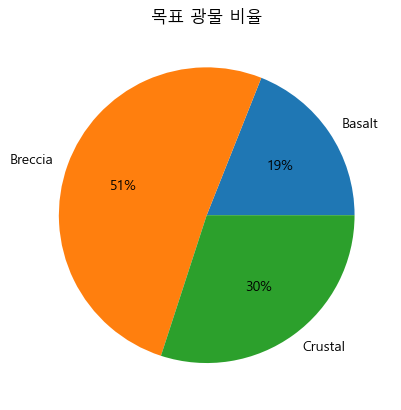

In [217]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

plt.pie(
    needed_samples_overview['Rocks to collect'], 
    labels=needed_samples_overview['Type'], 
    autopct='%.0f%%'
)
plt.title('목표 광물 비율')
plt.show()

##### 3. 후속 논의 과제 

분석 최종에서 아폴로 수집 광물 전체 데이터와, 수집 의미를 지닌 필터링된 광물 데이터가 혼용된 상태로 결과가 도출되었음. 이 부분을 개선할 필요성이 존재함


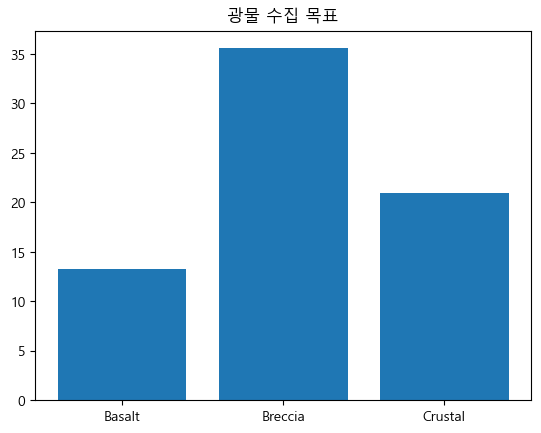

In [222]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

plt.bar(needed_samples_overview['Type'], needed_samples_overview['Rocks to collect']) 
plt.title('광물 수집 목표')
plt.show()

In [ ]:
needed_samples_overview

,Type,Total weight (kg),Average weight (kg),Number of samples,Percentage of rocks,Weight to collect,Rocks to collect
0,Basalt,17.42340,1.244529,351,0.258850,16.467267,13.231731
1,Breccia,10.11850,1.264813,959,0.707227,44.991764,35.571884
2,Crustal,4.74469,0.103145,46,0.033923,2.158103,20.922917
